In [1]:
# classification of iris flower specis using ML


In [3]:
import pandas as pd

In [4]:
df=pd.read_csv("iris.csv", names=['sl','sw','pl','pw','class'])
df

,sl,sw,pl,pw,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
df.shape


(150, 5)

In [6]:
df.columns


Index(['sl', 'sw', 'pl', 'pw', 'class'], dtype='object')

In [7]:
df.head()


,sl,sw,pl,pw,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
df.tail()


,sl,sw,pl,pw,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [9]:
df.sample(10)


,sl,sw,pl,pw,class
124,6.7,3.3,5.7,2.1,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica
20,5.4,3.4,1.7,0.2,Iris-setosa
34,4.9,3.1,1.5,0.1,Iris-setosa
93,5.0,2.3,3.3,1.0,Iris-versicolor
141,6.9,3.1,5.1,2.3,Iris-virginica
1,4.9,3.0,1.4,0.2,Iris-setosa
78,6.0,2.9,4.5,1.5,Iris-versicolor
55,5.7,2.8,4.5,1.3,Iris-versicolor
35,5.0,3.2,1.2,0.2,Iris-setosa


In [10]:
df['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [11]:
import seaborn as sns

<Axes: xlabel='class', ylabel='count'>

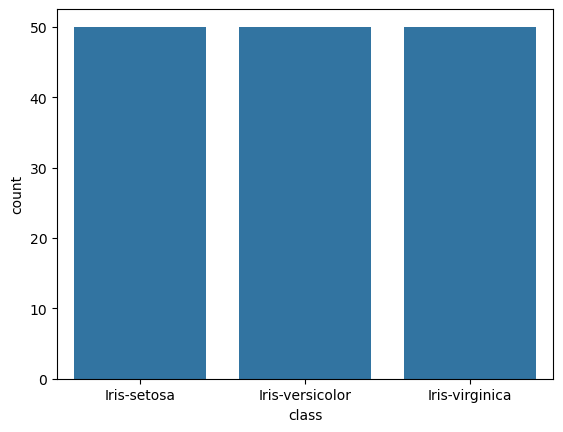

In [12]:
sns.countplot(x=df['class'])

In [13]:
import matplotlib.pyplot as plt

([<matplotlib.patches.Wedge at 0x27c19b044a0>,
 [Text(0.5499999702695115, 0.9526279613277875, 'setosa'),
  Text(-1.0999999999999954, -1.0298943258065002e-07, 'versicolor'),
  Text(0.5500001486524352, -0.9526278583383436, 'virginica')],
 [Text(0.2999999837833699, 0.5196152516333385, '33.33%'),
  Text(-0.5999999999999974, -5.6176054134900006e-08, '33.33%'),
  Text(0.30000008108314646, -0.5196151954572783, '33.33%')])

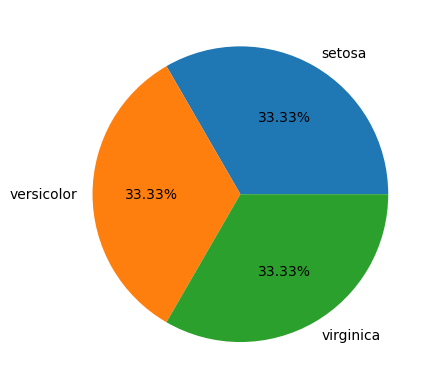

In [14]:
plt.pie(df['class'].value_counts(), labels=['setosa','versicolor','virginica'],autopct="%0.2f%%")

In [15]:
# Display maximum value of sepal length
df['sl'].max()

7.9

In [16]:
df['sl'].min()


4.3

In [17]:
#display the flower details with highest sepal length
df.loc[df['sl']==df['sl'].max()]

,sl,sw,pl,pw,class
131,7.9,3.8,6.4,2.0,Iris-virginica


In [18]:
# display the maximum sepal length of setosa
df.loc[df['class']=='Iris-setosa']['sl'].max()

5.8

In [19]:
df.describe()

,sl,sw,pl,pw
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [20]:
df.loc[df['class']=='Iris-versicolor']['sl'].max()

7.0

In [21]:
# convert the class column into numeric

In [22]:
from sklearn.preprocessing import LabelEncoder


In [23]:
le=LabelEncoder()
df['class']=le.fit_transform(df['class'])
df.sample(5)

,sl,sw,pl,pw,class
83,6.0,2.7,5.1,1.6,1
71,6.1,2.8,4.0,1.3,1
91,6.1,3.0,4.6,1.4,1
20,5.4,3.4,1.7,0.2,0
56,6.3,3.3,4.7,1.6,1


In [24]:
# separate input and output


In [25]:
X=df.drop(columns=['class'])
Y=df['class']

In [26]:
# check for missing values
df.isnull().sum()

sl       0
sw       0
pl       0
pw       0
class    0
dtype: int64

In [27]:
# split the data into to parts  (one for training and oter for testing)
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=5)

In [28]:
X_train


,sl,sw,pl,pw
39,5.1,3.4,1.5,0.2
53,5.5,2.3,4.0,1.3
79,5.7,2.6,3.5,1.0
10,5.4,3.7,1.5,0.2
50,7.0,3.2,4.7,1.4
...,...,...,...,...
8,4.4,2.9,1.4,0.2
73,6.1,2.8,4.7,1.2
144,6.7,3.3,5.7,2.5
118,7.7,2.6,6.9,2.3


In [29]:
#  creat  a model for training
# lets use KNN  model  (k nearest neighors model)
from sklearn.neighbors import KNeighborsClassifier
K=KNeighborsClassifier(n_neighbors=5)
# train the model from train data
K.fit(X_train,Y_train)
# test the model by using testing data
Y_pred_knn=K.predict(X_test)
Y_pred_knn # predicted output of x_test

array([1, 2, 2, 0, 2, 1, 0, 2, 0, 1, 1, 2, 2, 2, 0, 0, 2, 2, 0, 0, 1, 2,
       0, 2, 1, 2, 1, 1, 1, 2])

In [30]:
Y_test.values # actual output of X_test


array([1, 2, 2, 0, 2, 1, 0, 1, 0, 1, 1, 2, 2, 2, 0, 0, 2, 2, 0, 0, 1, 2,
       0, 1, 1, 2, 1, 1, 1, 2])

In [31]:
# find accuracy of model knn
from sklearn.metrics import accuracy_score
acc_knn=accuracy_score(Y_test,Y_pred_knn)
acc_knn=round(acc_knn*100,2)
acc_knn

93.33

In [38]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(Y_test, Y_pred_knn)


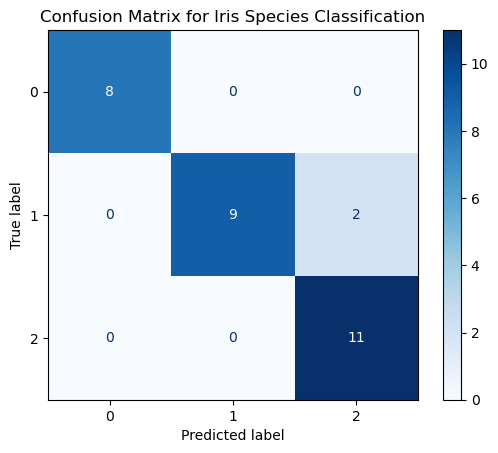

In [41]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Iris Species Classification')
plt.show()